In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [2]:
#load in csv for movies and tv shows
cleaned_movie = pd.read_csv("Output/movie_df.csv")
del cleaned_movie["Unnamed: 0"]
cleaned_movie = cleaned_movie.drop_duplicates()
cleaned_movie

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Robert De Niro,Travis Bickle,ACTOR,1976,0.0,8.2,808582.0,['US']
1,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Jodie Foster,Iris Steensma,ACTOR,1976,0.0,8.2,808582.0,['US']
2,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Albert Brooks,Tom,ACTOR,1976,0.0,8.2,808582.0,['US']
3,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,1976,0.0,8.2,808582.0,['US']
4,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Cybill Shepherd,Betsy,ACTOR,1976,0.0,8.2,808582.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48780,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Jim Pirri,Sal Maroni (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
48781,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Zach Callison,Young Bruce Wayne (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
48782,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Rick D. Wasserman,Bodyguard (voice),ACTOR,2021,0.0,7.1,12033.0,['US']
48783,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",Chris Palmer,--,DIRECTOR,2021,0.0,7.1,12033.0,['US']


In [3]:
cleaned_tv = pd.read_csv("Output/show_df.csv")
del cleaned_tv["Unnamed: 0"]
cleaned_tv = cleaned_tv.drop_duplicates()
cleaned_tv

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
0,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Graham Chapman,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
1,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Michael Palin,"Various / ""It's"" man",ACTOR,1969,4.0,8.8,73424.0,['GB']
2,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Terry Jones,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
3,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Eric Idle,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
4,ts22164,1.0,0.0,0.0,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",Terry Gilliam,Various,ACTOR,1969,4.0,8.8,73424.0,['GB']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7863,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Shunsuke Takeuchi,Makoto Suzuki (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']
7864,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Shota Hayama,Kazushi Yamagishi (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']
7865,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Satoshi Hino,Masataka Koyomizu (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']
7866,ts249912,0.0,0.0,1.0,Tokyo Revengers,SHOW,TV-14,24,"['drama', 'animation', 'action', 'crime', 'sci...",Masaaki Mizunaka,Keisuke Baji (voice),ACTOR,2021,1.0,8.2,13520.0,['JP']


In [4]:
#load in netflix dataframe
netflix_df = pd.read_csv("Output/netflix_df.csv")
del netflix_df["Unnamed: 0"]
netflix_df = netflix_df.drop_duplicates()
netflix_df

,id,title,type,age_certification,runtime,genres,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm84618,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",1976,0.0,8.2,808582.0,['US']
37,tm154986,Deliverance,MOVIE,R,109,"['drama', 'action', 'thriller', 'european']",1972,0.0,7.7,107673.0,['US']
60,tm127384,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",1975,0.0,8.2,534486.0,['GB']
108,tm120801,The Dirty Dozen,MOVIE,NaN,150,"['war', 'action']",1967,0.0,7.7,72662.0,"['GB', 'US']"
163,ts22164,Monty Python's Flying Circus,SHOW,TV-14,30,"['comedy', 'european']",1969,4.0,8.8,73424.0,['GB']
...,...,...,...,...,...,...,...,...,...,...,...
18385,ts278,Black Mirror,SHOW,TV-MA,59,"['drama', 'scifi', 'thriller', 'european']",2011,5.0,8.8,526383.0,['GB']
18386,ts35256,Chef's Table,SHOW,TV-MA,50,['documentation'],2015,7.0,8.5,15352.0,['US']
18387,ts88361,"Love, Death & Robots",SHOW,TV-MA,13,"['scifi', 'animation', 'thriller', 'horror', '...",2019,3.0,8.4,131937.0,['US']
18388,ts227305,Tiger King,SHOW,TV-MA,44,"['documentation', 'crime']",2020,2.0,7.5,77790.0,['US']


In [5]:
netflix_df['age_certification'].value_counts()

TV-MA    211
R        156
PG-13    127
TV-14    100
PG        54
TV-PG     20
TV-Y7     13
G          9
TV-G       8
NC-17      5
TV-Y       1
Name: age_certification, dtype: int64

In [6]:
#load in hulu dataframe
hulu_df = pd.read_csv("Output/hulu_df.csv")
del hulu_df["Unnamed: 0"]
hulu_df = hulu_df.drop_duplicates()
hulu_df

,id,title,type,age_certification,runtime,genres,release_year,seasons,imdb_score,imdb_votes,production_countries
0,ts20475,Saturday Night Live,SHOW,TV-14,89,"['music', 'comedy']",1975,47.0,8.0,47910.0,['US']
21,ts20413,M*A*S*H,SHOW,TV-PG,26,"['war', 'comedy', 'drama']",1972,11.0,8.4,55882.0,['US']
28,ts20005,I Love Lucy,SHOW,TV-G,30,"['comedy', 'family']",1951,9.0,8.5,25944.0,['US']
32,ts20669,Taxi,SHOW,TV-PG,25,"['drama', 'comedy']",1978,5.0,7.7,13379.0,['US']
41,ts17013,The Brady Bunch,SHOW,TV-G,25,"['comedy', 'family']",1969,5.0,6.7,14080.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...
9943,ts90492,Nine Perfect Strangers,SHOW,TV-MA,49,"['drama', 'thriller']",2021,1.0,7.0,45758.0,['US']
9956,ts224364,Cruel Summer,SHOW,TV-14,42,"['drama', 'thriller']",2021,1.0,7.4,13094.0,['US']
9964,tm406724,Boss Level,MOVIE,R,94,"['scifi', 'thriller', 'action']",2021,0.0,6.8,62596.0,"['US', 'GB']"
10002,tm919867,"Quo Vadis, Aida?",MOVIE,NaN,101,"['drama', 'history', 'war']",2021,0.0,8.0,31596.0,"['NO', 'TR', 'NL', 'DE', 'BA', 'FR', 'PL', 'RO..."


In [7]:
hulu_df['age_certification'].value_counts()

TV-14    163
TV-MA    117
R         95
TV-PG     51
PG-13     43
TV-Y7     16
PG        16
TV-G       5
G          4
TV-Y       2
Name: age_certification, dtype: int64

In [8]:
#load in hbo dataframe
hbo_df = pd.read_csv("Output/hbo_df.csv")
del hbo_df["Unnamed: 0"]
hbo_df = hbo_df.drop_duplicates()
hbo_df

,id,title,type,age_certification,runtime,genres,release_year,seasons,imdb_score,imdb_votes,production_countries
0,tm155702,The Wizard of Oz,MOVIE,G,102,"['fantasy', 'family']",1939,0.0,8.1,389774.0,['US']
23,tm83648,Citizen Kane,MOVIE,PG,119,['drama'],1941,0.0,8.3,433804.0,['US']
176,tm77588,Casablanca,MOVIE,PG,102,"['drama', 'romance', 'war']",1942,0.0,8.5,558849.0,['US']
282,tm82363,The Big Sleep,MOVIE,NaN,116,"['thriller', 'crime']",1946,0.0,7.9,84494.0,['US']
329,tm84701,The Maltese Falcon,MOVIE,NaN,100,"['thriller', 'romance', 'crime']",1941,0.0,8.0,156603.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...
28742,tm1128929,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,"['documentation', 'family']",2022,0.0,8.0,37637.0,"['US', 'GB']"
28783,tm1048591,8-Bit Christmas,MOVIE,PG,97,"['comedy', 'family', 'fantasy']",2021,0.0,6.7,15561.0,['US']
28797,tm1042385,Friends: The Reunion,MOVIE,NaN,104,"['documentation', 'comedy', 'history', 'romance']",2021,0.0,8.0,57553.0,['US']
28834,tm996852,"Batman: The Long Halloween, Part Two",MOVIE,R,87,"['crime', 'animation', 'action', 'horror', 'sc...",2021,0.0,7.1,12033.0,['US']


In [9]:
hbo_df['age_certification'].value_counts()

R        256
PG-13    174
TV-MA    114
PG        94
TV-14     53
G         29
TV-PG     25
TV-Y7     14
TV-G       7
NC-17      6
TV-Y       2
Name: age_certification, dtype: int64

The r value is: 0.35


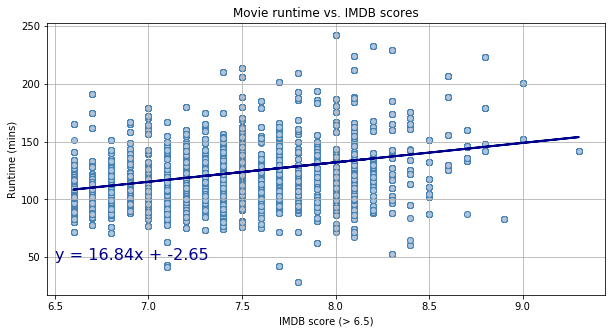

In [39]:
#score vs. movie runtime graph
x_value = cleaned_movie["imdb_score"]
y_value = cleaned_movie["runtime"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(6.5,48),color="darkblue",fontsize=16)
print(f"The r value is: {round(rvalue,2)}")
plt.title("Movie runtime vs. IMDB scores")
plt.xlabel("IMDB score (> 6.5)")
plt.ylabel("Runtime (mins)")
plt.savefig("Output/runtime_vs_score.png")
plt.show()

There is a very weak positive correlation between a movie's runtime and its IMDb score.

The r value is: 0.11


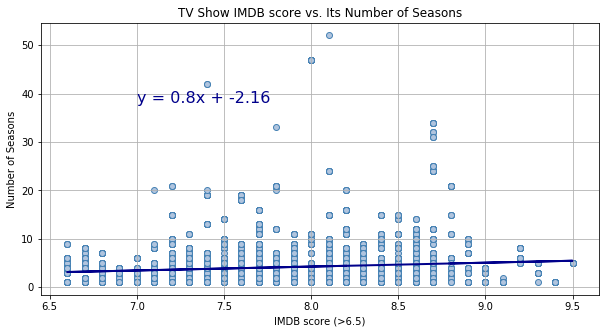

In [40]:
#score vs. season graph
x_value = cleaned_tv["imdb_score"]
y_value = cleaned_tv["seasons"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(7,38),color="darkblue",fontsize=16)
plt.title("TV Show IMDB score vs. Its Number of Seasons")
plt.xlabel("IMDB score (>6.5)")
plt.ylabel("Number of Seasons")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/seasons_vs_score.png")
plt.show()

There is almost no correlation between a show's IMDb score and the number of seasons it aired.

In [12]:
director_df = cleaned_movie[cleaned_movie["role"]=="DIRECTOR"]
director_df

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
36,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,"['drama', 'crime']",Martin Scorsese,--,DIRECTOR,1976,0.0,8.2,808582.0,['US']
59,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,"['drama', 'action', 'thriller', 'european']",John Boorman,--,DIRECTOR,1972,0.0,7.7,107673.0,['US']
106,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",Terry Jones,--,DIRECTOR,1975,0.0,8.2,534486.0,['GB']
107,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,"['fantasy', 'action', 'comedy']",Terry Gilliam,--,DIRECTOR,1975,0.0,8.2,534486.0,['GB']
162,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,"['war', 'action']",Robert Aldrich,--,DIRECTOR,1967,0.0,7.7,72662.0,"['GB', 'US']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48710,tm1128929,0.0,0.0,1.0,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,"['documentation', 'family']",Casey Patterson,--,DIRECTOR,2022,0.0,8.0,37637.0,"['US', 'GB']"
48711,tm1128929,0.0,0.0,1.0,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,"['documentation', 'family']",Giorgio Testi,--,DIRECTOR,2022,0.0,8.0,37637.0,"['US', 'GB']"
48725,tm1048591,0.0,0.0,1.0,8-Bit Christmas,MOVIE,PG,97,"['comedy', 'family', 'fantasy']",Michael Dowse,--,DIRECTOR,2021,0.0,6.7,15561.0,['US']
48762,tm1042385,0.0,0.0,1.0,Friends: The Reunion,MOVIE,NaN,104,"['documentation', 'comedy', 'history', 'romance']",Ben Winston,--,DIRECTOR,2021,0.0,8.0,57553.0,['US']


In [13]:
#use groupby to match director with avg imdb score
group_director = director_df.groupby("name")
avg_score = group_director.mean().reset_index()
avg_score = avg_score[["name","imdb_score"]]
avg_score

,name,imdb_score
0,A.R. Murugadoss,7.00
1,Aamir Khan,8.30
2,Aaron Horvath,6.70
3,Aaron Moorhead,6.70
4,Aaron Sorkin,7.55
...,...,...
942,Zack Snyder,7.40
943,Zal Batmanglij,6.80
944,Zoya Akhtar,7.40
945,Éric Rohmer,7.80


In [14]:
#use previous dataframe to get the number of movies each director has made
director_movie = group_director.count().reset_index()
director_movie = director_movie[["name","title"]]
director_movie

,name,title
0,A.R. Murugadoss,1
1,Aamir Khan,1
2,Aaron Horvath,1
3,Aaron Moorhead,1
4,Aaron Sorkin,2
...,...,...
942,Zack Snyder,4
943,Zal Batmanglij,1
944,Zoya Akhtar,3
945,Éric Rohmer,1


In [45]:
#merge the two dataframes together and filter out directors with less than 4 movies
final_director = pd.merge(director_movie, avg_score, how="outer", on=["name"])
final_director = final_director[final_director["title"]>3]
final_director = final_director[["name","imdb_score"]]
final_director = final_director.sort_values("imdb_score",ascending=False)

Akira Kurosawa has the highest average IMDb score with: 8.274999999999999


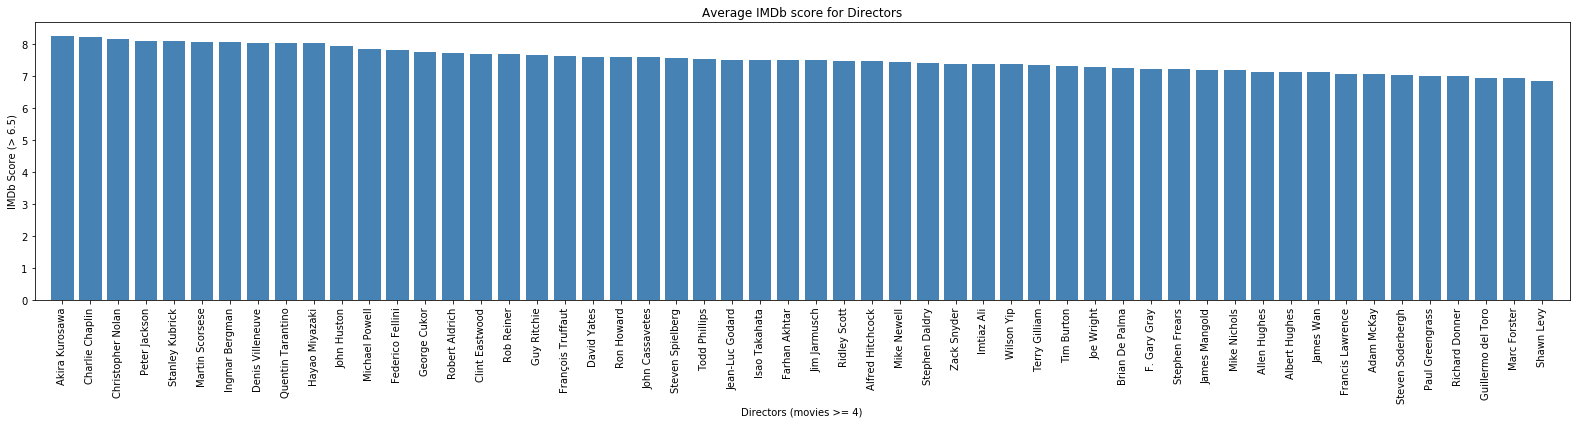

In [72]:
#create bar graph displaying director scores
x_axis = final_director["name"]
plt.figure(figsize=(22,6))
plt.bar(final_director["name"],final_director["imdb_score"],color="steelblue")
plt.xticks(rotation=90)
plt.title("Average IMDb score for Directors")
plt.xlabel("Directors (movies >= 4)")
plt.ylabel("IMDb Score (> 6.5)")
print(f"Akira Kurosawa has the highest average IMDb score with: {final_director.max(numeric_only=True).max()}")
plt.xlim(-1, len(x_axis))
plt.tight_layout()
plt.savefig("Output/director_score.png")
plt.show()

In [73]:
#filter dataframe to show Akira Kurosawa's movies
akira_df = cleaned_movie[cleaned_movie["name"]=="Akira Kurosawa"]
akira_df = akira_df.sort_values("imdb_score", ascending=False)

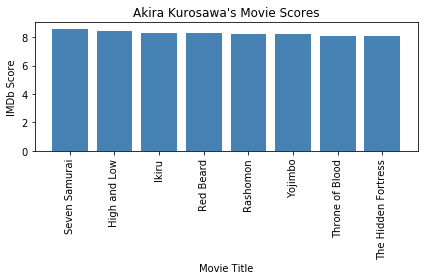

Seven Samurai is Akira Kurosawa's highest scoring film.


In [76]:
#create bar graph that shows Akira Kurosawa's movies and their scores
plt.bar(akira_df["title"],akira_df["imdb_score"],color="steelblue")
plt.xticks(rotation=90)
plt.title("Akira Kurosawa's Movie Scores")
plt.xlabel("Movie Title")
plt.ylabel("IMDb Score")
plt.tight_layout()
plt.savefig("Output/kurosawa_score.png")
plt.show()
print("Seven Samurai is Akira Kurosawa's highest scoring film.")

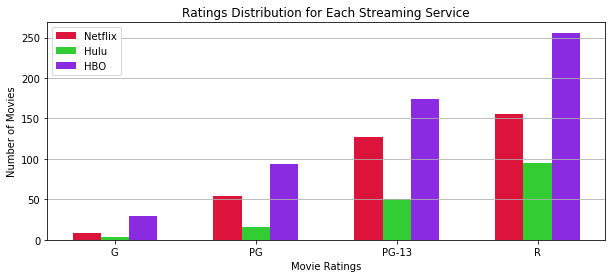

In [86]:
#create bar graphs comparing age certifications within each streaming service
ratings_m = ["G", "PG", "PG-13", "R"]
y1 = [9, 54, 127, 156]
y2 = [4, 16, 51, 95]
y3 = [29, 94, 174, 256]
x = np.arange(len(ratings_m))
width = 0.2
plt.figure(figsize=(10,4))
plt.bar(x - 0.2, y1, width, color="crimson")
plt.bar(x, y2, width, color="limegreen")
plt.bar(x + 0.2, y3, width, color="blueviolet")
plt.xticks(x, ["G", "PG", "PG-13", "R"])
plt.title("Ratings Distribution for Each Streaming Service")
plt.xlabel("Movie Ratings")
plt.ylabel("Number of Movies")
plt.legend(["Netflix", "Hulu", "HBO"])
plt.grid(b=True,which="major",axis="y")
plt.savefig("Output/movie_ratings_vs_service.png")
plt.show()

In [20]:
df = pd.DataFrame

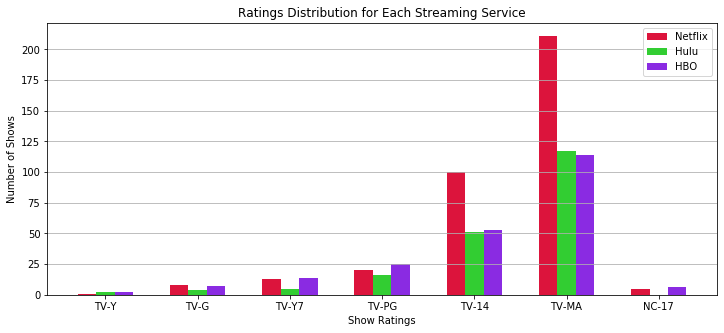

In [21]:
ratings_s = ["TV-Y", "TV-G", "TV-Y7", "TV-PG", "TV-14", "TV-MA", "NC-17"]
y1 = [1, 8, 13, 20, 100, 211, 5]
y2 = [2, 4, 5, 16, 51, 117, 0]
y3 = [2, 7, 14, 25, 53, 114, 6]
x = np.arange(len(ratings_s))
width = 0.2
plt.figure(figsize=(12,5))
plt.bar(x - 0.2, y1, width, color="crimson")
plt.bar(x, y2, width, color="limegreen")
plt.bar(x + 0.2, y3, width, color="blueviolet")
plt.xticks(x, ["TV-Y", "TV-G", "TV-Y7", "TV-PG", "TV-14", "TV-MA", "NC-17"])
plt.title("Ratings Distribution for Each Streaming Service")
plt.xlabel("Show Ratings")
plt.ylabel("Number of Shows")
plt.legend(["Netflix", "Hulu", "HBO"])
plt.grid(b=True,which="major",axis="y")
plt.savefig("Output/tv_ratings_vs_service.png")
plt.show()

In [22]:
cleaned_movie.sort_values("release_year",ascending=True)

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,genres,name,character,role,release_year,seasons,imdb_score,imdb_votes,production_countries
23956,tm122846,0.0,0.0,1.0,The Kid,MOVIE,NaN,53,"['drama', 'comedy', 'family']",Albert Austin,Man in Shelter (uncredited),ACTOR,1921,0.0,8.3,124364.0,['US']
23971,tm122846,0.0,0.0,1.0,The Kid,MOVIE,NaN,53,"['drama', 'comedy', 'family']",Lillian Crane,Extra in Wedding Scene (uncredited),ACTOR,1921,0.0,8.3,124364.0,['US']
23972,tm122846,0.0,0.0,1.0,The Kid,MOVIE,NaN,53,"['drama', 'comedy', 'family']",Dan Dillon,Bum (uncredited),ACTOR,1921,0.0,8.3,124364.0,['US']
23957,tm122846,0.0,0.0,1.0,The Kid,MOVIE,NaN,53,"['drama', 'comedy', 'family']",Charles Reisner,Bully (uncredited),ACTOR,1921,0.0,8.3,124364.0,['US']
23985,tm122846,0.0,0.0,1.0,The Kid,MOVIE,NaN,53,"['drama', 'comedy', 'family']",S.D. Wilcox,Cop (uncredited),ACTOR,1921,0.0,8.3,124364.0,['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21869,tm372685,0.0,1.0,1.0,Death on the Nile,MOVIE,PG-13,127,"['thriller', 'crime', 'drama']",Niamh Lynch,Female Porter,ACTOR,2022,0.0,6.6,18325.0,"['GB', 'US']"
21870,tm372685,0.0,1.0,1.0,Death on the Nile,MOVIE,PG-13,127,"['thriller', 'crime', 'drama']",Rosie Dwyer,Hotel Staff 2,ACTOR,2022,0.0,6.6,18325.0,"['GB', 'US']"
21871,tm372685,0.0,1.0,1.0,Death on the Nile,MOVIE,PG-13,127,"['thriller', 'crime', 'drama']",Nari Blair-Mangat,Hotel Staff 3,ACTOR,2022,0.0,6.6,18325.0,"['GB', 'US']"
21863,tm372685,0.0,1.0,1.0,Death on the Nile,MOVIE,PG-13,127,"['thriller', 'crime', 'drama']",Jonah Rzeskiewicz,German Soldier 3,ACTOR,2022,0.0,6.6,18325.0,"['GB', 'US']"


In [23]:
filtered_movie = cleaned_movie[['id', 'Netflix', 'Hulu', 'HBO', 'title', 'type', 'age_certification', 'runtime', 'release_year', 'imdb_score', 'imdb_votes']]
filtered_movie = filtered_movie.drop_duplicates()
filtered_movie

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,release_year,imdb_score,imdb_votes
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,1976,8.2,808582.0
37,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,1972,7.7,107673.0
60,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,1975,8.2,534486.0
108,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,1967,7.7,72662.0
163,tm70993,1.0,0.0,0.0,Life of Brian,MOVIE,R,94,1979,8.0,395024.0
...,...,...,...,...,...,...,...,...,...,...,...
48671,tm1128929,0.0,0.0,1.0,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,2022,8.0,37637.0
48712,tm1048591,0.0,0.0,1.0,8-Bit Christmas,MOVIE,PG,97,2021,6.7,15561.0
48726,tm1042385,0.0,0.0,1.0,Friends: The Reunion,MOVIE,NaN,104,2021,8.0,57553.0
48763,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,2021,7.1,12033.0


The r value is: -0.33


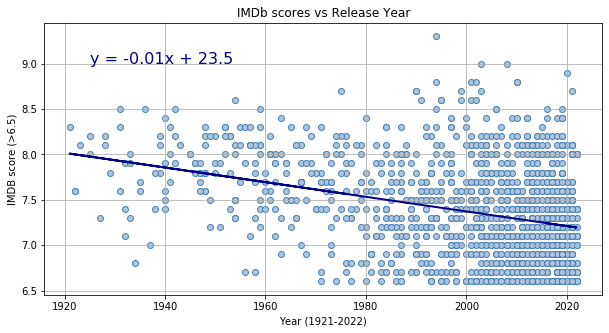

In [41]:
x_value = filtered_movie["release_year"]
y_value = filtered_movie["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1925,9),color="darkblue",fontsize=16)
plt.title("IMDb scores vs Release Year")
plt.xlabel("Year (1921-2022)")
plt.ylabel("IMDB score (>6.5)")
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/year_vs_score.png")
plt.show()

There is a weak correlation between older movies being rated higher than newer movies

In [25]:
filtered_old = filtered_movie[filtered_movie["release_year"]<2005]
filtered_old

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,release_year,imdb_score,imdb_votes
0,tm84618,1.0,0.0,0.0,Taxi Driver,MOVIE,R,114,1976,8.2,808582.0
37,tm154986,1.0,0.0,0.0,Deliverance,MOVIE,R,109,1972,7.7,107673.0
60,tm127384,1.0,0.0,0.0,Monty Python and the Holy Grail,MOVIE,PG,91,1975,8.2,534486.0
108,tm120801,1.0,0.0,0.0,The Dirty Dozen,MOVIE,NaN,150,1967,7.7,72662.0
163,tm70993,1.0,0.0,0.0,Life of Brian,MOVIE,R,94,1979,8.0,395024.0
...,...,...,...,...,...,...,...,...,...,...,...
42282,tm49384,0.0,0.0,1.0,Iris,MOVIE,R,91,2001,7.0,18057.0
42311,tm87062,0.0,0.0,1.0,Something the Lord Made,MOVIE,PG,110,2004,8.1,13348.0
42392,tm105088,0.0,0.0,1.0,Igby Goes Down,MOVIE,R,97,2002,6.9,33384.0
42470,tm87234,0.0,0.0,1.0,Maria Full of Grace,MOVIE,R,101,2004,7.4,34999.0


In [26]:
filtered_new = filtered_movie[filtered_movie["release_year"]>=2005]
filtered_new

,id,Netflix,Hulu,HBO,title,type,age_certification,runtime,release_year,imdb_score,imdb_votes
2233,tm74402,1.0,0.0,0.0,The Mist,MOVIE,R,126,2007,7.1,305346.0
2595,tm92641,1.0,0.0,0.0,Inception,MOVIE,PG-13,148,2010,8.8,2294231.0
2643,tm27911,1.0,0.0,0.0,The Departed,MOVIE,R,151,2006,8.5,1296244.0
2720,tm88465,1.0,0.0,0.0,Insidious,MOVIE,PG-13,103,2010,6.8,303820.0
2736,tm42877,1.0,0.0,0.0,Wanted,MOVIE,R,110,2008,6.7,384995.0
...,...,...,...,...,...,...,...,...,...,...,...
48671,tm1128929,0.0,0.0,1.0,Harry Potter 20th Anniversary: Return to Hogwarts,MOVIE,PG-13,103,2022,8.0,37637.0
48712,tm1048591,0.0,0.0,1.0,8-Bit Christmas,MOVIE,PG,97,2021,6.7,15561.0
48726,tm1042385,0.0,0.0,1.0,Friends: The Reunion,MOVIE,NaN,104,2021,8.0,57553.0
48763,tm996852,0.0,0.0,1.0,"Batman: The Long Halloween, Part Two",MOVIE,R,87,2021,7.1,12033.0


The r value is: -0.29


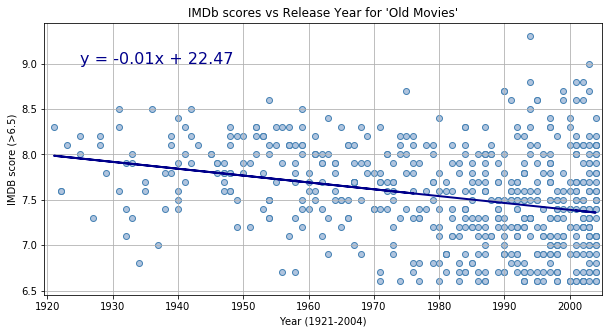

Movie Count: 587


In [42]:
x_value = filtered_old["release_year"]
y_value = filtered_old["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(1925,9),color="darkblue",fontsize=16)
plt.title("IMDb scores vs Release Year for 'Old Movies'")
plt.xlabel("Year (1921-2004)")
plt.ylabel("IMDB score (>6.5)")
plt.xlim(1919.5,2005)
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/old_release_vs_score.png")
plt.show()
print(f"Movie Count: {len(filtered_old)}")

The r value is: -0.06


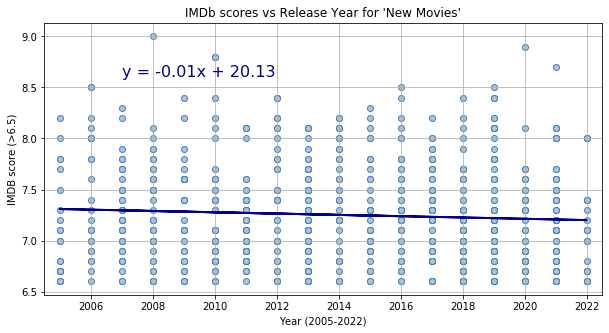

Movie Count: 779


In [43]:
x_value = filtered_new["release_year"]
y_value = filtered_new["imdb_score"]
plt.figure(figsize=(10,5))
plt.scatter(x_value,y_value, marker="o", color="lightsteelblue", edgecolors="steelblue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
regression_value = x_value * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_value,regression_value,"darkblue",linewidth=2)
plt.grid(b=True,which="major",axis="both")
plt.annotate(line_equation,(2007,8.6),color="darkblue",fontsize=16)
plt.title("IMDb scores vs Release Year for 'New Movies'")
plt.xlabel("Year (2005-2022)")
plt.ylabel("IMDB score (>6.5)")
plt.xlim(2004.5,2022.5)
print(f"The r value is: {round(rvalue,2)}")
plt.savefig("Output/new_release_vs_score.png")
plt.show()
print(f"Movie Count: {len(filtered_new)}")